<a href="https://colab.research.google.com/github/SarahPendhari/TumorSense/blob/main/Brain_Tumor_Detection_Comparative_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
import os

path = os.listdir(r'/content/drive/MyDrive/Dataset/Training')


In [3]:
classes = {'no_tumor' : 0 , 'pituitary_tumor' : 1}
classes

{'no_tumor': 0, 'pituitary_tumor': 1}

In [4]:
import cv2
X = []
Y = []
for cls in classes:
    pth = r'/content/drive/MyDrive/Dataset/Training//'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (200,200))
        X.append(img)
        Y.append(classes[cls])

In [5]:
X = np.array(X)
Y = np.array(Y)

In [6]:
np.unique(Y) # 0 - No Tumor(Negative), 1 - Tumor(Positive)

array([0, 1])

In [7]:
pd.Series(Y).value_counts()         #Calculating the count of both the categories

1    827
0    395
dtype: int64

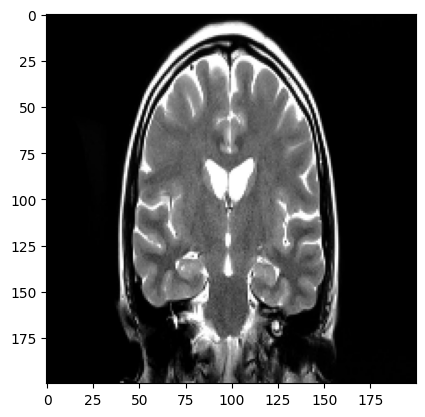

In [8]:
plt.imshow(X[10], cmap='gray')

In [9]:
X_updated = X.reshape(len(X), -1)
X_updated.shape

(1222, 40000)

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [11]:
xtrain, xtest, ytrain, ytest = train_test_split(X_updated, Y, random_state=42,test_size=.20)

In [12]:
xtrain.shape, xtest.shape

((977, 40000), (245, 40000))

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report


clf = DecisionTreeClassifier()
clf.fit(xtrain, ytrain)

# Make predictions on the test
ypred = clf.predict(xtest)

# Evaluate the model
accuracy = accuracy_score(ytest, ypred)
report = classification_report(ytest, ypred)
print(report)
# Print the results
print(f"Accuracy: {accuracy}")
# Assuming your model is trained with 40000 features per sample
# Adjust the resize dimensions accordingly
image = cv2.imread('/content/drive/MyDrive/Dataset/Training/meningioma_tumor/m (6).jpg', cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (200, 200))  # Adjusted to create 40000 features (200x200)

pixels = image.reshape(-1)
if len(pixels) == 40000:
    pixels2d = [pixels]
    predicted_class = clf.predict(pixels2d)
    print(f"Predicted Class: {predicted_class[0]}")
else:
    print("Error: Mismatch in feature dimensions.")


              precision    recall  f1-score   support

           0       0.96      0.98      0.97        83
           1       0.99      0.98      0.98       162

    accuracy                           0.98       245
   macro avg       0.98      0.98      0.98       245
weighted avg       0.98      0.98      0.98       245

Accuracy: 0.9795918367346939
Predicted Class: 1


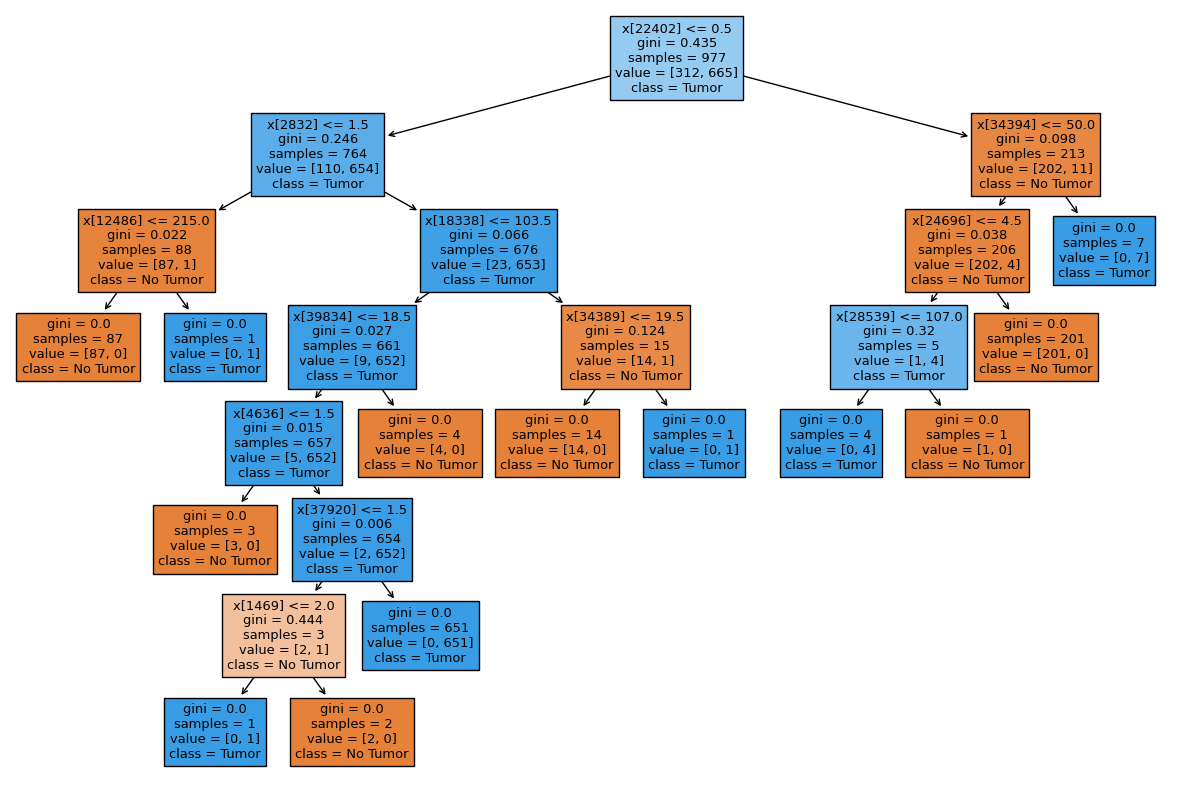

In [14]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(15, 10))
plot_tree(clf, filled=True, feature_names=None, class_names=["No Tumor","Tumor"])
plt.savefig('decision_tree.png')
plt.show()

Confusion Matrix:
[[ 81   2]
 [  3 159]]


Normalized Confusion Matrix - Decision Tree:
[[0.97590361 0.02409639]
 [0.01851852 0.98148148]]


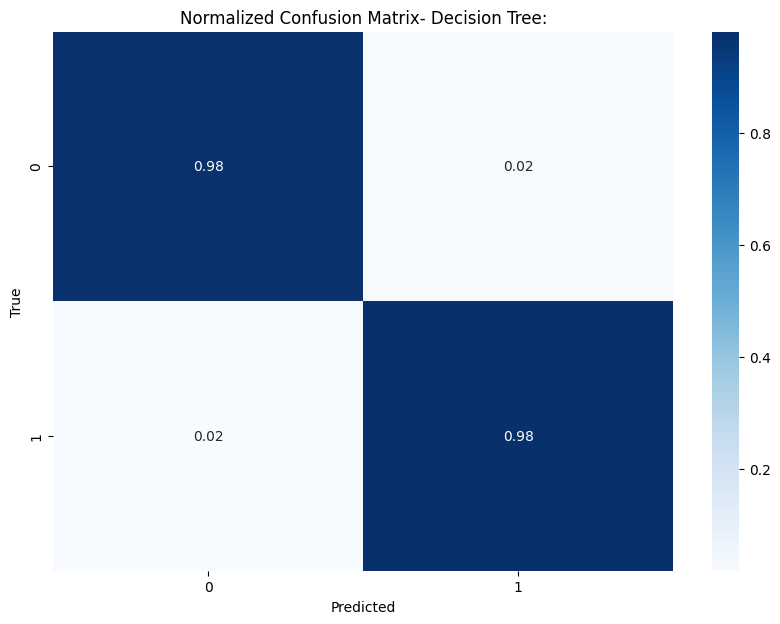

In [15]:
from sklearn.metrics import confusion_matrix

# Assuming ypred and ytest are already defined as per your previous code

# Calculate confusion matrix
conf_matrix = confusion_matrix(ytest, ypred)

# Print the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)
print('\n')
normalized_conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]

# Print the normalized confusion matrix
print("Normalized Confusion Matrix - Decision Tree:")
print(normalized_conf_matrix)

# Plot the normalized confusion matrix with a blue color map
plt.figure(figsize=(10, 7))
sns.heatmap(normalized_conf_matrix, annot=True, fmt=".2f", cmap="Blues")
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Normalized Confusion Matrix- Decision Tree:')
plt.show()


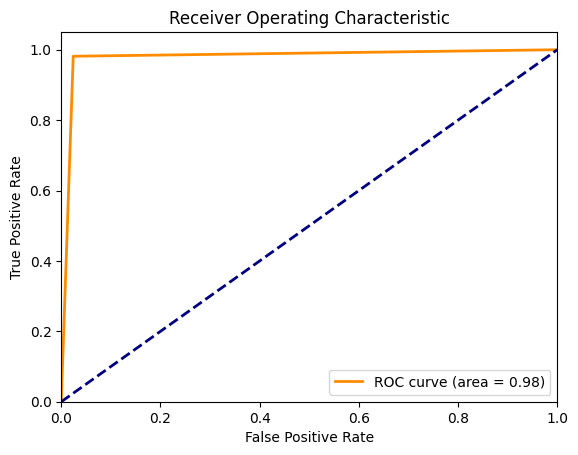

In [16]:
from sklearn.metrics import roc_curve, auc

# Assuming you have a binary classification and ytest, xtest are your test labels and features
# Compute probabilities
y_prob = clf.predict_proba(xtest)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(ytest, y_prob)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


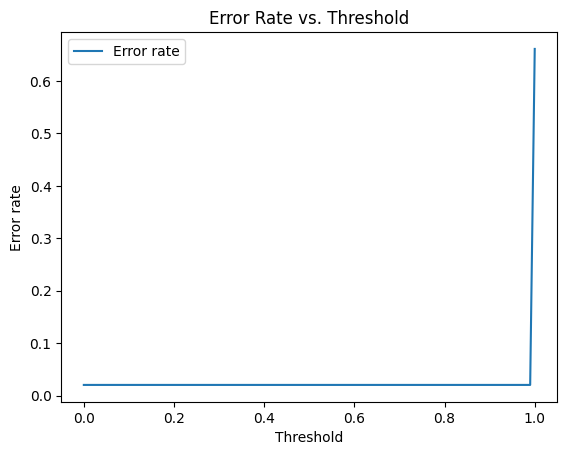

In [17]:
errors = []
thresholds = np.linspace(0, 1, 100)

for thresh in thresholds:
    errors.append(np.mean(((y_prob > thresh) * 1) != ytest))

plt.figure()
plt.plot(thresholds, errors, label='Error rate')
plt.xlabel('Threshold')
plt.ylabel('Error rate')
plt.title('Error Rate vs. Threshold')
plt.legend()
plt.show()


In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

In [19]:
# Create a Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42) # n_estimators is the number of trees

# Train the model on the training data
rf_clf.fit(xtrain, ytrain)


RandomForestClassifier(random_state=42)

In [20]:
# Make predictions on the test data
y_pred_rf = rf_clf.predict(xtest)

# Evaluate the model
accuracy_rf = accuracy_score(ytest, y_pred_rf)
report_rf = classification_report(ytest, y_pred_rf)

# Print the results
print(f"Random Forest Accuracy: {accuracy_rf}")
print("Random Forest Classification Report:")
print(report_rf)


Random Forest Accuracy: 0.9918367346938776
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.98      1.00      0.99        83
           1       1.00      0.99      0.99       162

    accuracy                           0.99       245
   macro avg       0.99      0.99      0.99       245
weighted avg       0.99      0.99      0.99       245



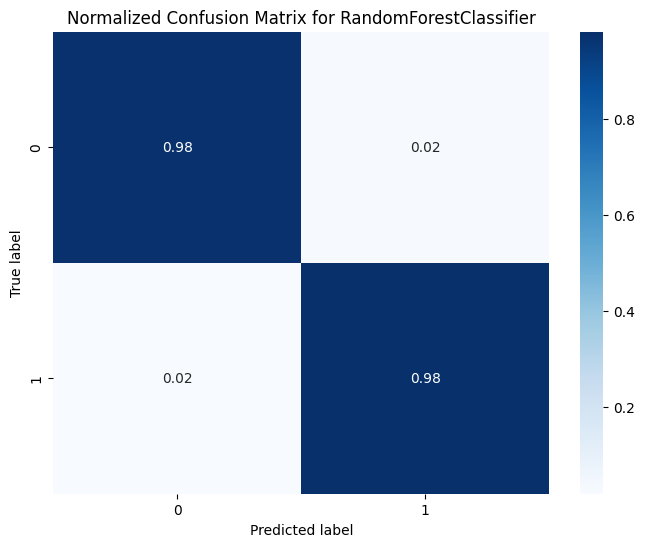

In [21]:
# Compute confusion matrix
cm = confusion_matrix(ytest, ypred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

# Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap='Blues',
            xticklabels=rf_clf.classes_, yticklabels=rf_clf.classes_)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Normalized Confusion Matrix for RandomForestClassifier')
plt.show()


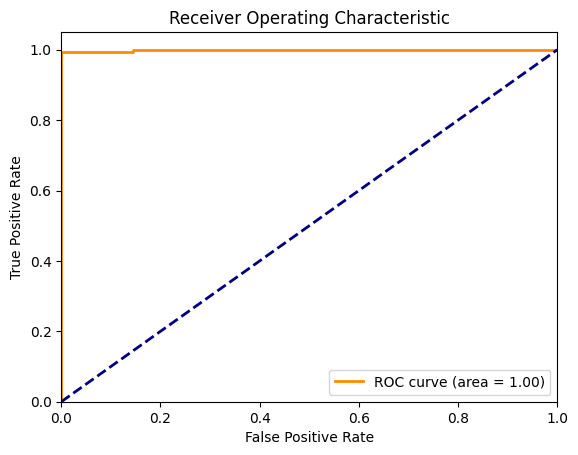

In [22]:
# Assuming you have your test labels in ytest and
# your model's predicted probabilities for the positive class in y_scores
y_scores = rf_clf.predict_proba(xtest)[:, 1]  # For binary classification

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(ytest, y_scores)
roc_auc = auc(fpr, tpr)

# Plotting
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


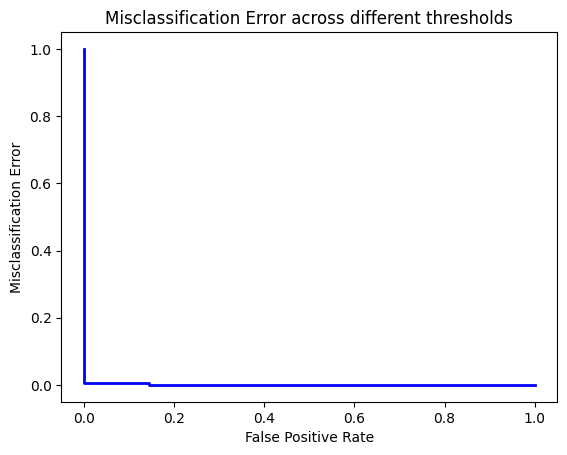

In [23]:
# Calculate the misclassification for each threshold
misclassification = 1 - tpr

# Plotting
plt.figure()
plt.plot(fpr, misclassification, color='blue', lw=2)
plt.xlabel('False Positive Rate')
plt.ylabel('Misclassification Error')
plt.title('Misclassification Error across different thresholds')
plt.show()


In [24]:
from sklearn.neighbors import KNeighborsClassifier

In [25]:
knn_clf = KNeighborsClassifier(n_neighbors=5)
knn_clf.fit(xtrain, ytrain)
# Making predictions
ypred_knn = knn_clf.predict(xtest)

# Evaluating the model
accuracy_knn = accuracy_score(ytest, ypred_knn)
report_knn = classification_report(ytest, ypred_knn)

# Print the results
print(f"Accuracy: {accuracy_knn}")
print("Classification Report:")
print(report_knn)


Accuracy: 0.9387755102040817
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.82      0.90        83
           1       0.92      1.00      0.96       162

    accuracy                           0.94       245
   macro avg       0.96      0.91      0.93       245
weighted avg       0.94      0.94      0.94       245



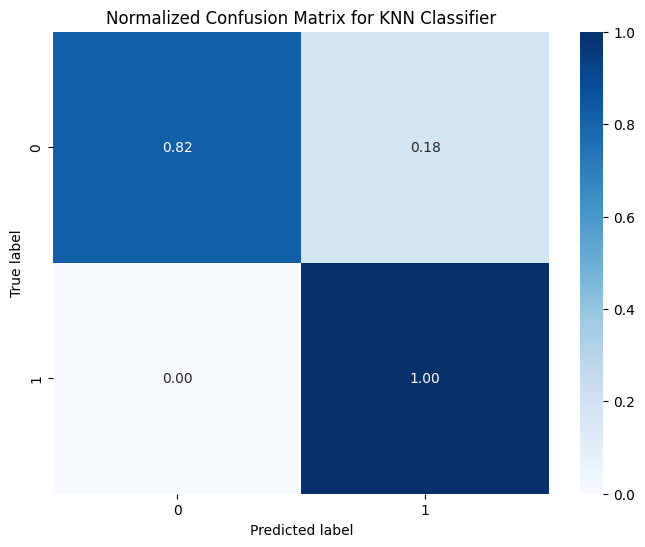

In [26]:
cm_knn = confusion_matrix(ytest, ypred_knn)
cm_knn_normalized = cm_knn.astype('float') / cm_knn.sum(axis=1)[:, np.newaxis]
plt.figure(figsize=(8, 6))
sns.heatmap(cm_knn_normalized, annot=True, fmt=".2f", cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Normalized Confusion Matrix for KNN Classifier')
plt.show()


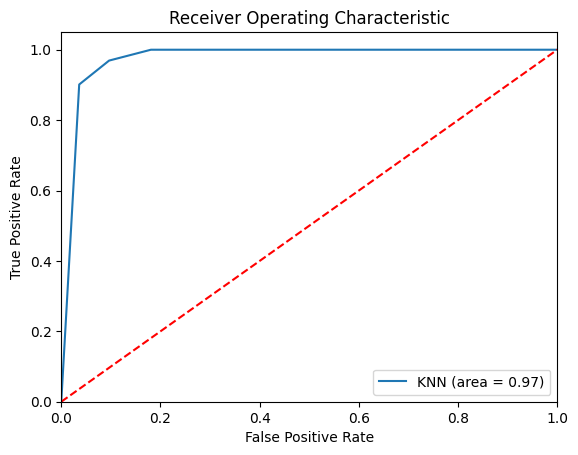

In [27]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming your model and test data are named knn_classifier, Xtest, ytest
# Compute predicted probabilities: y_pred_prob
y_pred_prob = knn_clf.predict_proba(xtest)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(ytest, y_pred_prob)

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label='KNN (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()


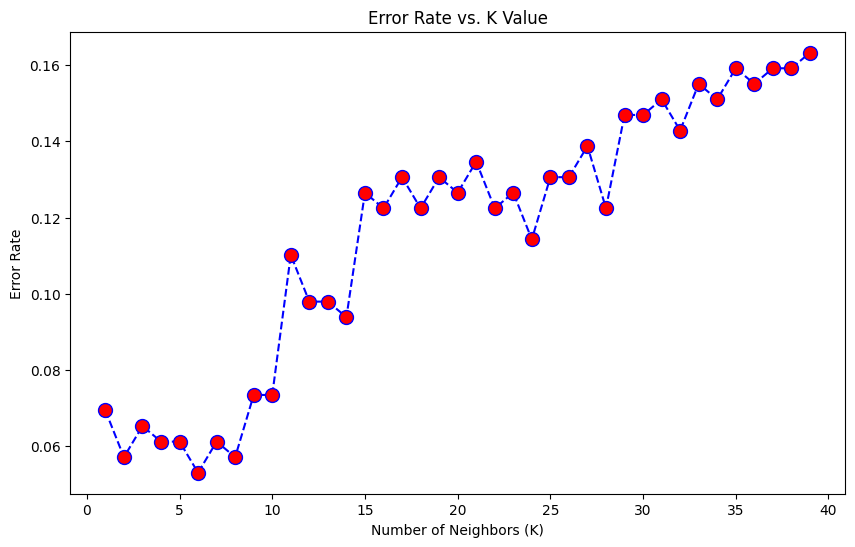

In [28]:
error_rate = []
for i in range(1, 40):  # Assuming you want to test from 1 to 39 neighbors
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(xtrain, ytrain)
    pred_i = knn.predict(xtest)
    error_rate.append(np.mean(pred_i != ytest))

# Plot
plt.figure(figsize=(10, 6))
plt.plot(range(1, 40), error_rate, color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Error Rate')
plt.show()


In [29]:
from sklearn import svm
# Create a SVM classifier with a linear kernel
svm_clf = svm.SVC(kernel='linear')

# Train the model on the training data
svm_clf.fit(xtrain, ytrain)
# Predict the response for the test dataset
y_pred = svm_clf.predict(xtest)

# Calculate accuracy
accuracy = accuracy_score(ytest, y_pred)
print(f"Accuracy: {accuracy}")

# Print classification report for detailed analysis
print(classification_report(ytest, y_pred))


Accuracy: 0.9346938775510204
              precision    recall  f1-score   support

           0       0.96      0.84      0.90        83
           1       0.92      0.98      0.95       162

    accuracy                           0.93       245
   macro avg       0.94      0.91      0.92       245
weighted avg       0.94      0.93      0.93       245



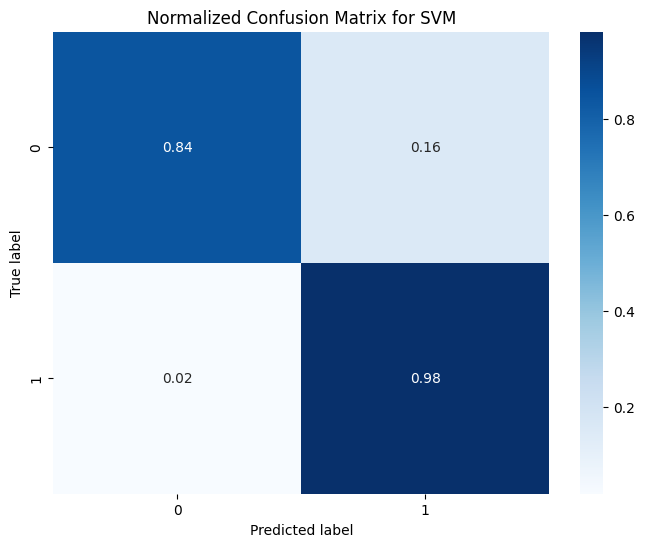

In [30]:
# Compute confusion matrix
cm = confusion_matrix(ytest, y_pred)

# Normalize the confusion matrix
cm_normalized = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm_normalized, annot=True, fmt=".2f", cmap="Blues")
plt.title('Normalized Confusion Matrix for SVM')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


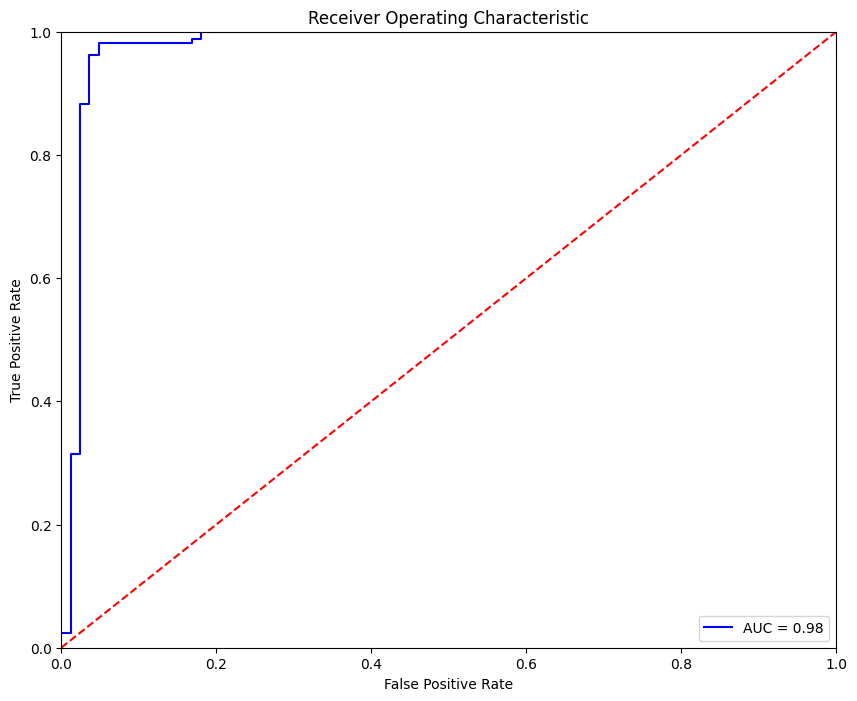

In [31]:

y_scores = svm_clf.decision_function(xtest)
fpr, tpr, threshold = roc_curve(ytest, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(10, 8))
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


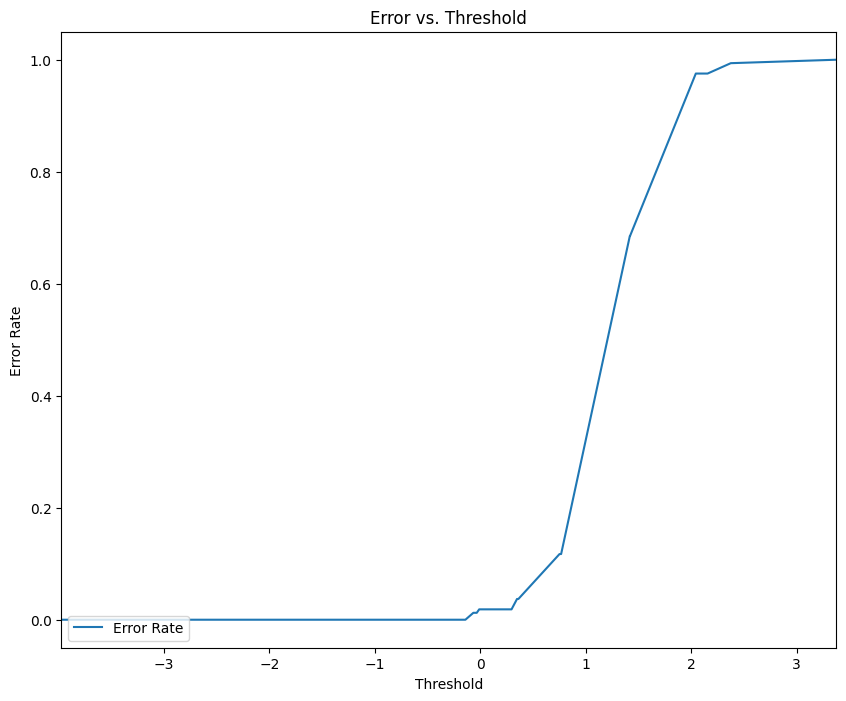

In [32]:
plt.figure(figsize=(10, 8))
plt.title('Error vs. Threshold')
plt.plot(threshold, 1 - tpr, label='Error Rate')
plt.legend(loc = 'lower left')
plt.xlim([threshold.min(), threshold.max()])
plt.xlabel('Threshold')
plt.ylabel('Error Rate')
plt.show()


In [33]:
import numpy as np
import os
import cv2
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam

# Load and preprocess data
def load_data(directory, classes):
    X = []
    Y = []
    for idx, cls in enumerate(classes):
        path = os.path.join(directory, cls)
        for img in os.listdir(path):
            try:
                image = cv2.imread(os.path.join(path, img))
                image = cv2.resize(image, (100, 100))  # Resize images
                X.append(image)
                Y.append(idx)
            except Exception as e:
                print(e)
    return np.array(X), np.array(Y)

# Classes
classes = ['no_tumor', 'pituitary_tumor']  # Update with your classes
data_directory = '/content/drive/MyDrive/Dataset/Training//'  # Update with your dataset path

# Load dataset
X, Y = load_data(data_directory, classes)

# Normalize the data
X = X / 255.0

# One-hot encode labels
Y = to_categorical(Y, num_classes=len(classes))

# Split the data
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.2, random_state=42)

# Build CNN model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(len(classes), activation='softmax'))  # Output layer

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(xtrain, ytrain, epochs=10, validation_data=(xtest, ytest))

# Evaluate the model
test_loss, test_acc = model.evaluate(xtest, ytest)
print(f"Test Accuracy: {test_acc}")

# Model summary
model.summary()


Epoch 1/10
31/31 [==============================] - 10s 45ms/step - loss: 0.6574 - accuracy: 0.7001 - val_loss: 0.4560 - val_accuracy: 0.8122
Epoch 2/10
31/31 [==============================] - 0s 15ms/step - loss: 0.3098 - accuracy: 0.8843 - val_loss: 0.1688 - val_accuracy: 0.9510
Epoch 3/10
31/31 [==============================] - 0s 16ms/step - loss: 0.1914 - accuracy: 0.9314 - val_loss: 0.1232 - val_accuracy: 0.9755
Epoch 4/10
31/31 [==============================] - 0s 15ms/step - loss: 0.1408 - accuracy: 0.9447 - val_loss: 0.2150 - val_accuracy: 0.9265
Epoch 5/10
31/31 [==============================] - 0s 15ms/step - loss: 0.0927 - accuracy: 0.9693 - val_loss: 0.0806 - val_accuracy: 0.9673
Epoch 6/10
31/31 [==============================] - 0s 15ms/step - loss: 0.0612 - accuracy: 0.9744 - val_loss: 0.0634 - val_accuracy: 0.9755
Epoch 7/10
31/31 [==============================] - 0s 16ms/step - loss: 0.0424 - accuracy: 0.9887 - val_loss: 0.0653 - val_accuracy: 0.9837
Epoch 8/10
3

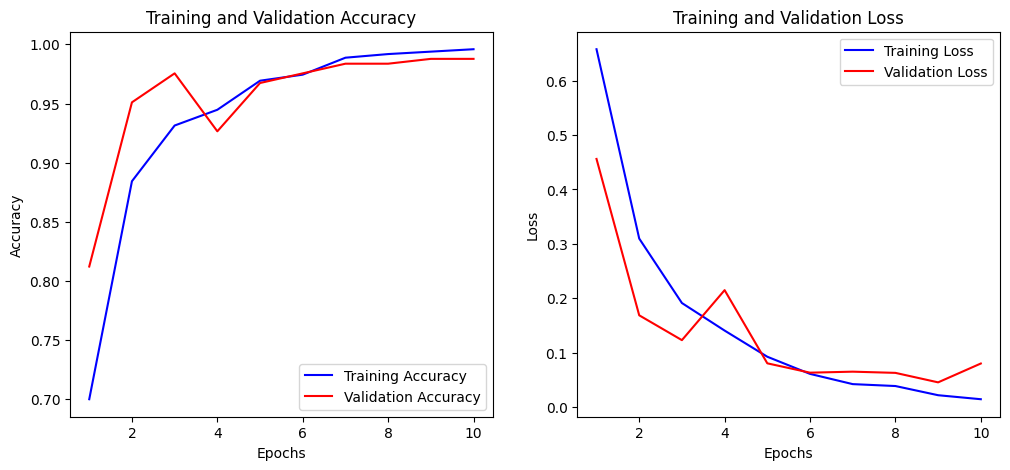

In [37]:
history_dict = history.history

# Extract accuracy and loss values for training
acc = history_dict['accuracy']
loss = history_dict['loss']

# Extract accuracy and loss values for validation
val_acc = history_dict['val_accuracy']
val_loss = history_dict['val_loss']

# Range of epochs
epochs = range(1, len(acc) + 1)

# Accuracy plot
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, '-', label='Training Accuracy', color='blue')  # Blue for training
plt.plot(epochs, val_acc, '-', label='Validation Accuracy', color='red')  # Green for validation
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(epochs, loss, '-', label='Training Loss', color='blue')  # Blue for training
plt.plot(epochs, val_loss, '-', label='Validation Loss', color='red')  # Green for validation
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()


In [35]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [46]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Input

# VGG16 model
vgg16_model = VGG16(weights='imagenet', include_top=False, input_tensor=Input(shape=(100, 100, 3)))

# Freeze the layers of VGG16
for layer in vgg16_model.layers:
    layer.trainable = False

# Build the model
model_vgg16 = Sequential()
model_vgg16.add(vgg16_model)
model_vgg16.add(Flatten())
model_vgg16.add(Dense(64, activation='relu'))
model_vgg16.add(Dropout(0.5))
model_vgg16.add(Dense(len(classes), activation='softmax'))

# Compile
model_vgg16.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history_vgg16 = model_vgg16.fit(xtrain, ytrain, epochs=10, validation_data=(xtest, ytest))

vgg16_loss, vgg16_accuracy = model_vgg16.evaluate(xtest, ytest)
print(f"VGG16 Test Accuracy: {vgg16_accuracy}")

Epoch 1/10
31/31 [==============================] - 4s 84ms/step - loss: 0.4772 - accuracy: 0.7820 - val_loss: 0.1964 - val_accuracy: 0.9306
Epoch 2/10
31/31 [==============================] - 1s 43ms/step - loss: 0.1712 - accuracy: 0.9406 - val_loss: 0.1154 - val_accuracy: 0.9592
Epoch 3/10
31/31 [==============================] - 1s 40ms/step - loss: 0.1210 - accuracy: 0.9611 - val_loss: 0.1038 - val_accuracy: 0.9796
Epoch 4/10
31/31 [==============================] - 1s 42ms/step - loss: 0.1093 - accuracy: 0.9662 - val_loss: 0.0932 - val_accuracy: 0.9592
Epoch 5/10
31/31 [==============================] - 1s 43ms/step - loss: 0.0778 - accuracy: 0.9795 - val_loss: 0.0769 - val_accuracy: 0.9592
Epoch 6/10
31/31 [==============================] - 1s 40ms/step - loss: 0.0561 - accuracy: 0.9836 - val_loss: 0.0620 - val_accuracy: 0.9837
Epoch 7/10
31/31 [==============================] - 1s 40ms/step - loss: 0.0606 - accuracy: 0.9846 - val_loss: 0.0656 - val_accuracy: 0.9673
Epoch 8/10
31

In [42]:
def plot_metrics(history, title):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))

    # Accuracy plot
    plt.subplot(1, 2, 1)
    plt.plot(epochs, acc, 'b-', label='Training Accuracy')
    plt.plot(epochs, val_acc, 'r-', label='Validation Accuracy')
    plt.title(f'Training and Validation Accuracy for {title}')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Loss plot
    plt.subplot(1, 2, 2)
    plt.plot(epochs, loss, 'b-', label='Training Loss')
    plt.plot(epochs, val_loss, 'r-', label='Validation Loss')
    plt.title(f'Training and Validation Loss for {title}')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.show()


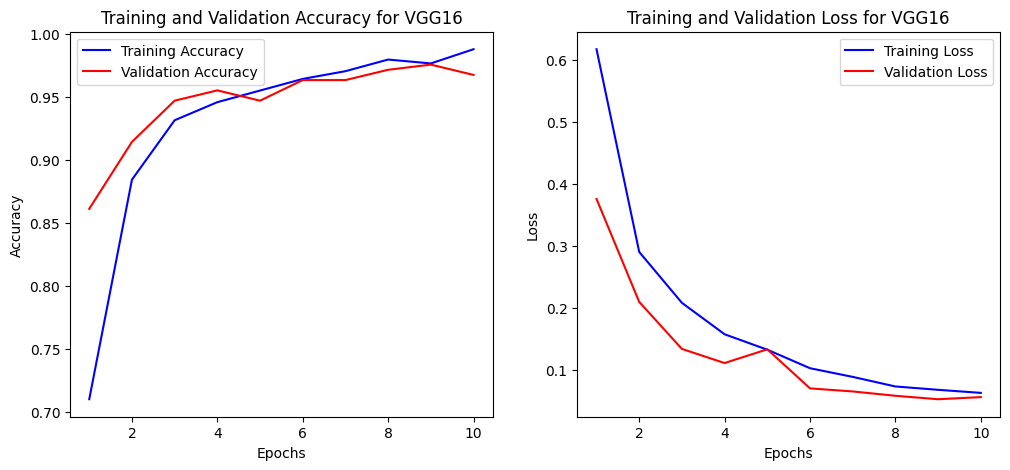

In [43]:
plot_metrics(history_vgg16, "VGG16")

In [47]:
from tensorflow.keras.applications import VGG19

# VGG19 model
vgg19_model = VGG19(weights='imagenet', include_top=False, input_tensor=Input(shape=(100, 100, 3)))

# Freeze the layers of VGG19
for layer in vgg19_model.layers:
    layer.trainable = False

# Build the model
model_vgg19 = Sequential()
model_vgg19.add(vgg19_model)
model_vgg19.add(Flatten())
model_vgg19.add(Dense(64, activation='relu'))
model_vgg19.add(Dropout(0.5))
model_vgg19.add(Dense(len(classes), activation='softmax'))

# Compile
model_vgg19.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])

# Train
history_vgg19 = model_vgg19.fit(xtrain, ytrain, epochs=10, validation_data=(xtest, ytest))

vgg19_loss, vgg19_accuracy = model_vgg19.evaluate(xtest, ytest)
print(f"VGG19 Test Accuracy: {vgg19_accuracy}")

Epoch 1/10
31/31 [==============================] - 4s 70ms/step - loss: 0.4982 - accuracy: 0.7769 - val_loss: 0.2666 - val_accuracy: 0.8898
Epoch 2/10
31/31 [==============================] - 2s 50ms/step - loss: 0.2269 - accuracy: 0.9263 - val_loss: 0.1568 - val_accuracy: 0.9388
Epoch 3/10
31/31 [==============================] - 1s 48ms/step - loss: 0.1407 - accuracy: 0.9570 - val_loss: 0.1264 - val_accuracy: 0.9388
Epoch 4/10
31/31 [==============================] - 1s 48ms/step - loss: 0.1110 - accuracy: 0.9754 - val_loss: 0.1387 - val_accuracy: 0.9429
Epoch 5/10
31/31 [==============================] - 1s 48ms/step - loss: 0.0943 - accuracy: 0.9713 - val_loss: 0.0813 - val_accuracy: 0.9633
Epoch 6/10
31/31 [==============================] - 1s 48ms/step - loss: 0.0801 - accuracy: 0.9816 - val_loss: 0.0639 - val_accuracy: 0.9714
Epoch 7/10
31/31 [==============================] - 2s 49ms/step - loss: 0.0631 - accuracy: 0.9826 - val_loss: 0.0638 - val_accuracy: 0.9755
Epoch 8/10
31

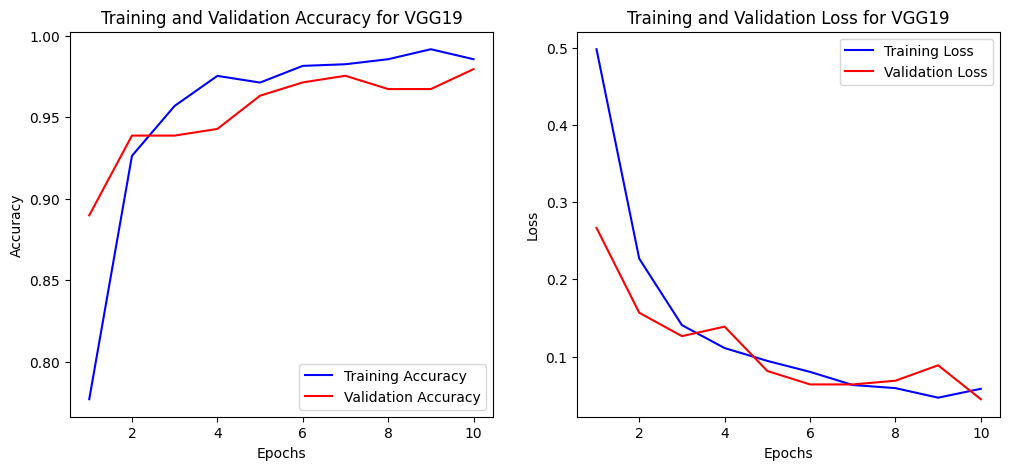

In [49]:
plot_metrics(history_vgg19, "VGG19")